<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-News-Articles" data-toc-modified-id="Acquire-News-Articles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire News Articles</a></span></li><li><span><a href="#Prepare-News-Articles" data-toc-modified-id="Prepare-News-Articles-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare News Articles</a></span><ul class="toc-item"><li><span><a href="#Extra-Cleaning" data-toc-modified-id="Extra-Cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extra Cleaning</a></span></li></ul></li><li><span><a href="#Explore-Text" data-toc-modified-id="Explore-Text-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Text</a></span><ul class="toc-item"><li><span><a href="#Create-Numeric-Columns-in-df" data-toc-modified-id="Create-Numeric-Columns-in-df-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create Numeric Columns in df</a></span></li></ul></li><li><span><a href="#Identify-Important-Words-in-Text" data-toc-modified-id="Identify-Important-Words-in-Text-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Identify Important Words in Text</a></span><ul class="toc-item"><li><span><a href="#Create-and-Visualize-N-grams" data-toc-modified-id="Create-and-Visualize-N-grams-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create and Visualize N-grams</a></span><ul class="toc-item"><li><span><a href="#Create-N-grams-Function" data-toc-modified-id="Create-N-grams-Function-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Create N-grams Function</a></span></li><li><span><a href="#Visualize-N-grams" data-toc-modified-id="Visualize-N-grams-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Visualize N-grams</a></span></li></ul></li><li><span><a href="#Create-a-Series-for--Corpus-of-Words-by-Topic-Label" data-toc-modified-id="Create-a-Series-for--Corpus-of-Words-by-Topic-Label-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create a Series for  Corpus of Words by Topic Label</a></span></li><li><span><a href="#Create-a-Series-of-Word-Frequencies-for-Each-Topic-Label" data-toc-modified-id="Create-a-Series-of-Word-Frequencies-for-Each-Topic-Label-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create a Series of Word Frequencies for Each Topic Label</a></span></li></ul></li><li><span><a href="#Remove-More-Stopwords" data-toc-modified-id="Remove-More-Stopwords-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove More Stopwords</a></span><ul class="toc-item"><li><span><a href="#Create-df-of-Word-Frequencies-for-Each-Subset-Above" data-toc-modified-id="Create-df-of-Word-Frequencies-for-Each-Subset-Above-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create df of Word Frequencies for Each Subset Above</a></span></li><li><span><a href="#Search-for-Topic-specific-Words" data-toc-modified-id="Search-for-Topic-specific-Words-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Search for Topic-specific Words</a></span></li><li><span><a href="#Word-Clouds!" data-toc-modified-id="Word-Clouds!-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Word Clouds!</a></span></li></ul></li></ul></div>

In [24]:
import pandas as pd
import numpy as np

import os
import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from acquire_walkthrough import get_news_articles
from prepare_walkthrough import prep_article_data

## Acquire News Articles

In [42]:
df = get_news_articles()

## Prepare News Articles

I'm going to use my cleaned, lemmatized text with minimal stopwords removed to start; that is how my `prep_article_data` will deliver my text to me here. As I explore, I will probably be adding stopwords and removing tokens that are just noise as I come across them.

In [43]:
df = prep_article_data(df)

In [44]:
df.head()

,topic,title,author,content,clean_stemmed,clean_lemmatized
0,business,US firm buys Serum Institute parent's Czech un...,Krishna Veera Vanamali,US biotech firm Novavax has announced it's buy...,us biotech firm novavax ha announc buy czech r...,u biotech firm novavax ha announced buying cze...
1,business,"Twitter CEO donates $10M to project giving $1,...",Pragya Swastik,Twitter's billionaire CEO Jack Dorsey has dona...,twitter billionair ceo jack dorsey ha donat 10...,twitter billionaire ceo jack dorsey ha donated...
2,business,Google in talks to buy 5% stake in Vodafone Id...,Krishna Veera Vanamali,Google is exploring an investment in Vodafone ...,googl explor invest vodafon idea part us techn...,google exploring investment vodafone idea part...
3,business,Microsoft in talks to buy 2.5% stake in Jio fo...,Anushka Dixit,Microsoft is in talks with Mukesh Ambani-led R...,microsoft talk mukesh ambanil relianc industri...,microsoft talk mukesh ambaniled reliance indus...
4,business,25-year-old Anant Ambani joins $65 billion Jio...,Krishna Veera Vanamali,Asia's richest person Mukesh Ambani's 25-year-...,asia richest person mukesh ambani 25yearold so...,asia richest person mukesh ambanis 25yearold s...


In [45]:
# Select label and text and rename accordingly
df_lem = df[['topic', 'clean_lemmatized']]

df_lem = df_lem.rename(columns={'topic': 'label', 'clean_lemmatized': 'text'})

# df_lem uses lemmatized text
df_lem.head(1)

,label,text
0,business,u biotech firm novavax ha announced buying cze...


### Extra Cleaning

As I explore my text data, I will find more things I want to remove. I know from exploring the text I scraped from inshort articles that there are a lot of numbers that are not useful to me for my purposes of sentiment analysis and creating a machine learning model that can predict the topic, or label, of an article. I'm going to remove numbers from my text here, and as I find more unnecessary tokens, I will return here to remove them.

In [46]:
# replace numbers in my text column with empty strings.

df_lem['text'] = df_lem.text.replace(r'\d', '', regex=True)

In [47]:
df_lem.head()

,label,text
0,business,u biotech firm novavax ha announced buying cze...
1,business,twitter billionaire ceo jack dorsey ha donated...
2,business,google exploring investment vodafone idea part...
3,business,microsoft talk mukesh ambaniled reliance indus...
4,business,asia richest person mukesh ambanis yearold son...


In [48]:
# split my text into lists of words

words = df_lem['text'].str.split()
words.head()

0    [u, biotech, firm, novavax, ha, announced, buy...
1    [twitter, billionaire, ceo, jack, dorsey, ha, ...
2    [google, exploring, investment, vodafone, idea...
3    [microsoft, talk, mukesh, ambaniled, reliance,...
4    [asia, richest, person, mukesh, ambanis, yearo...
Name: text, dtype: object

In [50]:
# remove extra stopwords identified through exploration

extra_stopwords_list = ['ha', 'wa', 'said', 'u', '']
filtered_words = words.apply(lambda row: [word for word in row if word not in extra_stopwords_list])
filtered_words.head()

0    [biotech, firm, novavax, announced, buying, cz...
1    [twitter, billionaire, ceo, jack, dorsey, dona...
2    [google, exploring, investment, vodafone, idea...
3    [microsoft, talk, mukesh, ambaniled, reliance,...
4    [asia, richest, person, mukesh, ambanis, yearo...
Name: text, dtype: object

In [53]:
# join my lists of words into strings and reassign my filtered words to my df as text

df_lem['text'] = filtered_words.str.join(' ')
df_lem.head()

,label,text
0,business,biotech firm novavax announced buying czech re...
1,business,twitter billionaire ceo jack dorsey donated mi...
2,business,google exploring investment vodafone idea part...
3,business,microsoft talk mukesh ambaniled reliance indus...
4,business,asia richest person mukesh ambanis yearold son...


## Explore Text

Our dataframe has 100 rows/observations and 2 columns; `label` is one of four topics, business, entertainment, technology, sports, which is our target, and `text` is a string of tokens/words from each observation or article. Each observation is the text from one article and the topic of the article.

In [54]:
print(f'Our df_lem dataframe has {df_lem.shape[0]} rows and {df_lem.shape[1]} columns')

Our df_lem dataframe has 100 rows and 2 columns


In [55]:
# I only have four possible values for my label column. I'm going to make it a category dtype

df_lem.label.value_counts()

sports           25
business         25
entertainment    25
technology       25
Name: label, dtype: int64

In [56]:
df_lem['label'] = df_lem.label.astype('category')

In [57]:
# Our scraped data is very balanced!

labels = pd.concat([df_lem.label.value_counts(),
                    df_lem.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
technology,25,0.25
sports,25,0.25
entertainment,25,0.25
business,25,0.25


In [58]:
# Take a quick look at my text column values

df_lem.text.head()

0    biotech firm novavax announced buying czech re...
1    twitter billionaire ceo jack dorsey donated mi...
2    google exploring investment vodafone idea part...
3    microsoft talk mukesh ambaniled reliance indus...
4    asia richest person mukesh ambanis yearold son...
Name: text, dtype: object

### Create Numeric Columns in df

In [59]:
# Create a column that gives the length of the text/string for each observation

df_lem['length'] = df_lem.text.apply(len)
df_lem.head()

,label,text,length
0,business,biotech firm novavax announced buying czech re...,274
1,business,twitter billionaire ceo jack dorsey donated mi...,260
2,business,google exploring investment vodafone idea part...,230
3,business,microsoft talk mukesh ambaniled reliance indus...,262
4,business,asia richest person mukesh ambanis yearold son...,245


## Identify Important Words in Text

### Create and Visualize N-grams

In creating my Bag of Words to search my Corpus for the most common uni, bi, and trigrams, I see that I have empty strings, single letters, and truncated verbs that will not add meaning to my exploration. I will definitely go back to my 'extra cleaning' section and remove the following stopwords: u, ha, '', wa, said.

In [61]:
# create a bag of words or list with every word from every observation

bow = ' '.join(df_lem.text).split(' ')
bow[:10]

['biotech',
 'firm',
 'novavax',
 'announced',
 'buying',
 'czech',
 'republicbased',
 'praha',
 'vaccine',
 'unit']

In [ ]:
# create lists of uni-, bi-, and trigrams

unigrams = list(ngrams(bow, 1))
bigrams = list(ngrams(bow, 2))
trigrams = list(ngrams(bow, 3))

In [71]:
# create a dictionary holding the uni-, bi-, and trigrams from our bow

grams_dict = {'unigrams': unigrams, 'bigrams': bigrams, 'trigrams': trigrams}
grams_dict.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Create N-grams Function

In [72]:
def grab_ngrams(df, col):
    '''
    This function takes in a df and a string name for a column, creates
    a bag of words by combining the words in all of the observations, and
    returns a dictionary holding all uni-, bi-, and trigrams.
    '''
    # create our corpus or bag of words
    bow = ' '.join(df[col]).split(' ')
    
    # create lists of uni-, bi-, and trigrams
    unigrams = list(ngrams(bow, 1))
    bigrams = list(ngrams(bow, 2))
    trigrams = list(ngrams(bow, 3))
    
    # create a dictionary holding the uni-, bi-, and trigrams from our bow
    grams_dict = {'unigrams': unigrams, 'bigrams': bigrams, 'trigrams': trigrams}
    
    return grams_dict

In [73]:
ngrams_dict = grab_ngrams(df_lem, 'text')
ngrams_dict.keys()

dict_keys(['unigrams', 'bigrams', 'trigrams'])

#### Visualize N-grams

In [85]:
pd.Series(ngrams_dict['unigrams']).value_counts().head(20)

(added,)          33
(billion,)        23
(india,)          22
(company,)        19
(time,)           18
(platform,)       17
(user,)           15
(film,)           15
(year,)           15
(jio,)            14
(facebook,)       14
(investment,)     14
(twitter,)        13
(coronavirus,)    13
(google,)         13
(cricket,)        12
(ceo,)            12
(report,)         12
(orbit,)          11
(captain,)        11
dtype: int64

In [86]:
pd.Series(ngrams_dict['bigrams']).value_counts().head(20)

(social, medium)           8
(coronavirus, pandemic)    8
(virgin, orbit)            6
(elon, musk)               6
(jio, platform)            6
(medium, platform)         5
(nasa, astronaut)          5
(raised, billion)          5
(president, donald)        5
(reliance, industry)       5
(donald, trump)            5
(spacex, ceo)              4
(billion, month)           4
(vodafone, idea)           4
(ceo, elon)                4
(jio, raised)              4
(added, factcheck)         4
(amid, coronavirus)        4
(twitter, added)           4
(lakh, crore)              4
dtype: int64

In [79]:
top_10_unigrams = ngrams_dict['unigrams'][:10]
top_10_bigrams = ngrams_dict['bigrams'][:10]
top_10_trigrams = ngrams_dict['trigrams'][:10]

### Create a Series for  Corpus of Words by Topic Label

Creating the Corpus from our text means that we are making a large combined list of all of the tokens/words from all of our documents. In our context, that means that we will join all of the text from each row of a column into a long list of words, and then rejoin those words into long strings of words separated by spaces.

In [80]:
business_words = ' '.join(df_lem[df_lem.label == 'business'].no_num_text).split(' ')
business_words[:10]

['u',
 'biotech',
 'company',
 'novavax',
 'said',
 'ha',
 'started',
 'phase',
 '',
 'clinical']

In [81]:
entertainment_words = ' '.join(df_lem[df_lem.label == 'entertainment'].no_num_text).split(' ')
entertainment_words[:10]

['south',
 'indian',
 'actor',
 'prithviraj',
 'sukumaran',
 'today',
 'shared',
 'picture',
 'physical',
 'transformation']

In [82]:
sports_words = ' '.join(df_lem[df_lem.label == 'sports'].no_num_text).split(' ')
sports_words[:10]

['exindia',
 'captain',
 'rahul',
 'dravid',
 'ha',
 'said',
 'idea',
 'creating',
 'biosecure',
 'environment']

In [83]:
technology_words = ' '.join(df_lem[df_lem.label == 'technology'].no_num_text).split(' ')
technology_words[:10]

['former',
 'nasa',
 'apple',
 'engineer',
 'mark',
 'rober',
 'built',
 'elaborate',
 'obstacle',
 'course']

In [84]:
all_words = ' '.join(df_lem.no_num_text).split(' ')
all_words[:10]

['u',
 'biotech',
 'company',
 'novavax',
 'said',
 'ha',
 'started',
 'phase',
 '',
 'clinical']

### Create a Series of Word Frequencies for Each Topic Label

- Here I can see that I still have words and empty strings that are adding noise to my text data. I want to remove some of this noise at this point.

Words that add nothing to the meaning:

- empty strings `''`

- said

- ha

- wa

In [90]:
# I have a frequency of 70 for an empty string

business_freq = pd.Series(business_words).value_counts()
business_freq.head()

           70
said       26
ha         19
india      16
company    15
dtype: int64

In [95]:
# I'm going to get rid of the empty string noise here

df.no_num_text.replace()

In [96]:
# I'm checking that they're gone

business_freq.head()

said       26
ha         19
india      16
company    15
share       9
dtype: int64

In [91]:
business_freq.tail()

bloomberg     1
founded       1
member        1
completely    1
singtel       1
dtype: int64

In [88]:
entertainment_freq = pd.Series(entertainment_words).value_counts()
entertainment_freq.head()

said     23
wa       22
ha       16
film     16
added    12
dtype: int64

In [89]:
entertainment_freq.tail()

distress      1
yelled        1
decided       1
try           1
togetherso    1
dtype: int64

In [97]:
sports_freq = pd.Series(sports_words).value_counts()
sports_freq.head()

ha      20
        18
said    15
test    14
wa      12
dtype: int64

In [98]:
sports_freq.tail()

stintsi     1
speaking    1
probably    1
round       1
crease      1
dtype: int64

In [ ]:
technology_freq = pd.Series(technology_words).value_counts()

In [56]:
all_freq = pd.Series(all_words).value_counts()

## Remove More Stopwords

In [126]:
def remove_stopwords(df, col):
    '''
    This function takes in a df and a string for column name and 
    returns the df with a new column named 'clean' with stopwords removed.
    '''
    # Create stopword_list
    stopword_list = stopwords.words('english')
    stopword_list.extend(['', 'ha', 'wa', 'said', 'u'])
    
    # Split words in column
    words = df[col].str.split()
    
    # Check each word in each row of the column against stopword_list and return only those that are not in list
    filtered_words = words.apply(lambda row: [word for word in row if word not in stopword_list])
    
    # Create new column of words that have stopwords removed
    df['clean_' + col] = filtered_words.str.join(' ')
    
    return df

In [127]:
df = remove_stopwords(df_lem, 'no_num_text')
df.head()

,label,text,no_num_text,clean_no_num_text
0,business,u biotech company novavax said ha started phas...,u biotech company novavax said ha started phas...,biotech company novavax started phase clinical...
1,business,india economy estimated grown 12 quarter ended...,india economy estimated grown quarter ended m...,india economy estimated grown quarter ended ma...
2,business,tv motor company ha said cutting salary employ...,tv motor company ha said cutting salary employ...,tv motor company cutting salary employee six m...
3,business,mahindra group chairman anand mahindra said lo...,mahindra group chairman anand mahindra said lo...,mahindra group chairman anand mahindra lockdow...
4,business,uber firing 600 employee india 25 workforce co...,uber firing employee india workforce country...,uber firing employee india workforce country a...


### Create df of Word Frequencies for Each Subset Above

In [57]:
word_counts = (pd.concat([business_freq, entertainment_freq, sports_freq, technology_freq, all_freq], axis=1, sort=True)
              .set_axis(['all', 'business', 'entertainment', 'sports', 'technology'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

word_counts.head()

,all,business,entertainment,sports,technology
1,3,0,0,0,3
10,3,0,1,1,5
100,1,0,0,1,2
1000,1,0,0,1,2
10000,0,0,1,0,1


In [122]:
word_counts.sort_values(by='sports', ascending=False).head(20)

,all,business,entertainment,sports,technology
ha,19,16,20,14,69
said,26,23,15,13,77
million,9,0,0,10,19
share,9,1,1,9,20
company,15,1,0,8,24
wa,4,22,12,7,45
user,0,1,0,6,7
ceo,7,0,2,5,14
may,6,0,1,5,12
new,3,0,1,5,9


### Search for Topic-specific Words

In [117]:
word_counts[word_counts.business == 0].tail()

,all,business,entertainment,sports,technology
zealand,0,0,1,0,1
zhao,1,0,0,0,1
zing,0,0,2,0,2
zoho,0,0,0,1,1
zoom,0,0,0,2,2


In [72]:
word_counts[(
            (word_counts.business == 0) & 
            (word_counts.sports == 0) &
            (word_counts.technology == 0))]

,all,business,entertainment,sports,technology


### Word Clouds!

In [115]:
business_cloud = WordCloud(height=1000, width=1400).generate(' '.join(business_words))
technology_cloud = WordCloud(height=1000, width=1400).generate(' '.join(technology_words))

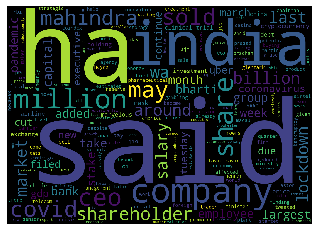

In [113]:
plt.imshow(business_cloud)
plt.axis('off')
plt.show()

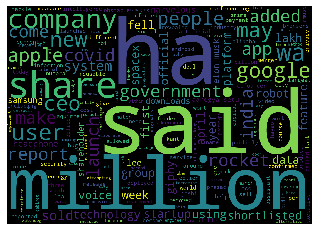

In [116]:
plt.imshow(technology_cloud)
plt.axis('off')
plt.show()